# Support Vector Machines Exercises

In [63]:
# Install qsolvers and gurobi solver
#
!pip install qpsolvers
!pip install -i https://pypi.gurobi.com gurobipy

# Download data
#
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/baseball.pickle -P ../data

Looking in indexes: https://pypi.gurobi.com


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [66]:
#Imports, Helper Functions and Data Structures
#

import numpy as np
from qpsolvers import solve_qp 
import numpy as np
import pickle

from dataclasses import dataclass
def load_dataset(filename):
    with open(filename, 'rb') as fd:
        dataset = pickle.load(fd)
    return dataset

# Baseball dataset
#
@dataclass
class Dataset:
    Description: str
    Attributes: list()
    Targets: list()
    X: np.array
    Y: np.array
        

# Helper functions needed for exercise
#
def plot_hyperplane(X,Y, n, b):
    """Plots the hyperplane defined by normalvector n and bias b.
    
    Parameters
    ----------
    X: np.array
        A two-dimensonal numpy array containing features. 
    Y: np.array
        A one dimensional numpy array containing class labels. Class labels
        are assumed not to be one-hot encoded but categorical integer values. 
    n: np.array
        A two-dimensional normalvector. 
    b: float
        Bias of the hyperplane. 

    Returns
    ----------
    Nothing
    """

    fig = plt.figure(figsize=(10,5))
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1])
    plt.scatter(X[Y == -1, 0], X[Y == -1, 1])
        
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = (np.dot(xy, n) - b).reshape(XX.shape)
    cs = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    plt.clabel(cs, inline=1) 
    plt.grid(True)
    
    
def gen_data(npoints=10, linear_separable=True):
    
    assert npoints >= 4, 'Requires at least 4 points. '
    
    # Generate a random normal-vector
    #
    n = np.random.randn(2)
    n = n / np.linalg.norm(n)

    # Generate a random bias
    # 
    b = np.random.randn(1)

    # Generate random points and label them such that they are linearly separable
    #
    X = np.random.randn(npoints,2) * 5

    tmp = np.dot(X, n) - b > 0
    Y = np.zeros(tmp.shape)
    Y[tmp == True] = 1
    Y[tmp == False] = -1
    
    if linear_separable == False:
        np.random.shuffle(Y)
    
    fig = plt.figure(figsize=(10,5))
    plt.scatter(X[Y == 1,0], X[Y == 1,1])
    plt.scatter(X[Y == -1,0], X[Y == -1,1])
    plt.grid(True)

    return X,Y

import numpy as np
import matplotlib.pyplot as plt

def plot_svm(X,Y, clf):

    fig = plt.figure(figsize=(10,5))
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1])
    plt.scatter(X[Y == -1, 0], X[Y == -1, 1])
        
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    cs = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    plt.clabel(cs, inline=1) 
    plt.grid(True)

## Exercise: SVM Hard-Margin

Remember: We formulated the search for the best hyperplane as an optimization problem of the form

$$\begin{equation*}
\begin{aligned}
& \underset{n}{\text{minimize}}
& & \|n\| = \sum_i n_i^2 \\
& \text{subject to}
& &y_i (n \cdot x_i -b) \geq 1, \quad \forall i.
\end{aligned}
\end{equation*}$$


We have a quadratic objective function and linear constraints. Problems of this sort are known as quadratic programs (QP). 

Quadratic programs are defined as
$$\begin{equation*}
\begin{aligned}
& \underset{x}{\text{minimize}}
& & \frac{1}{2} x^T P x + q^Tx \\
& \text{subject to}
& & Gx \leq h \\
& & & A x = b \\
& & & lb \leq x \leq ub
\end{aligned}
\end{equation*}$$

We use a QP solver to find our solution given a set of linear equality constraints and a set of linear inequality constraints. In our example, there are only inequality constraints and an objective function, we therefore have to **define** $P$, $q$, $G$ and $h$. 

In this example we assume our points are 2-dimensional. Therefore the normalvector of our plane is only 2-dimensional $n=(n_x, n_y)^T$.




### Exercise 1:
We start by defining our objective function in the form $\frac{1}{2} x^T P x + q^Tx$ where $x$ is a vector of our variables $(n_x, n_y, b)$, $P$ is a quadratic cost-matrix and $q$ is a cost-vector. 

Find a 3x3-matrix $P$ and a 1x3-vector $q$ such that:

$(n_x, n_y, b)\; P\; (n_x, n_y, b)^T + q\; (n_x, n_y, b)^T= n_x^2 + n_y^2$

*This exercise is best solved using pen and paper. Write your solution down here for later reference.*

### Exercise 2:


We next have to convert our constraints from $\geq$ to $\leq$. We do this by multiplying the inequality with $-1$

$$y_i (n \cdot x_i -b) \geq 1 = -y_i (n \cdot x_i -b) \leq -1$$

For a given set of two points $x_1 = (x_{11}, x_{12}) = (3,2),\, x_2 = (x_{21},x_{22}) = (-3,4)$ with labels $y_1 = 1, y_2 = -1$
Find the matrix $G$ such that

$G\; (n_x, n_y, b)^T = \begin{pmatrix}
-y_1( n\cdot x_1 -b)\\
-y_2( n\cdot x_2 -b)
\end{pmatrix} = \begin{pmatrix}
-y_1( n_x x_{11}  + n_y x_{12} -b)\\
-y_2( n_x x_{21}  + n_y x_{22} -b)
\end{pmatrix} = \begin{pmatrix}
-3n_x  - 2n_y + b\\
-3n_x  + 4n_y  -b
\end{pmatrix}$


*This exercise is best solved using pen and paper. Write your solution down here for later reference.*

### Exercise 3:

Manually define $P$, $q$, $G$ and $h$ using appropriate numpy-arrays to solve the optimization problem with ```solve_qp(P,q,G,h)```. Then plot your results using the ```plot_hyperplane()``` function. 

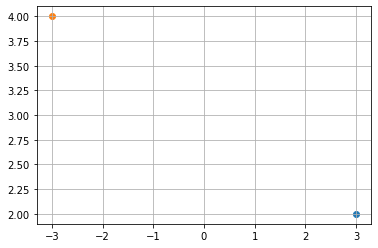

In [3]:
# Generates and plots the training data
#
X = np.array([[3, 2], [-3, 4]])
Y = np.array([1, -1])


import matplotlib.pyplot as plt
plt.scatter(X[Y == 1,0], X[Y == 1,1])
plt.scatter(X[Y == -1,0], X[Y == -1,1])
plt.grid(True)


### Exercise 4:

We saw that $P$ and $q$ do not depend on our training-data. But $G$ and $h$ does depend on our training-data. 
* Implement a function that creates a matrix $G$ and vector $h$ based on a given set of training features $X$ and labels $Y$. 
* Use the ```gen_data()```function to generate data and use your implementation to find a hyperplane via ```solve_qp(P,q,G,h)``` and plot it. 
* Generate some non-linearly separable data using ```gen_data(linear_separable=False)```and try to find a hyperplane using the ```solve_qp(P,q,G,h)``` function, what happens and why? 

## Exercise: SVM in scikit-learn

Let us now use the implementation of SVM from scikit-learn. 

## Exercise 1: 

* Generate some data using ```X,Y = gen_data()```.
* Train a linear support vector machine using scikit-learn. 
* Plot your decision boundary using the ```plot_svm(X,Y,clf)``` function.
* Compare the decision boundary found by scikit-learn to the decision boundary you would find using your **Hard-Margin SVM** from the previous exercise using the same training data.
* Compare the values of the normal vectors and bias term (clf.coef_[0] and clf.intercept_) to your **Hard-Margin** solution.

## Exercise 2: 

* Generate some data using ```X,Y = gen_data(linear_separable=False)```.
* Train a linear support vector machine using scikit-learn.
* Plot your decision boundary using the ```plot_svm(X,Y,clf)``` function.
* Train another suppor vector machine using the kernel trick in scikit-learn.
* Plot your decision boundary of the non-linear svm using the ```plot_svm(X,Y,clf)``` function.

## Exercise 3:

* Load the baseball dataset using ```load_dataset(../data/baseball.pickle)```.
* Have a look at the dataset, there are multiple fields such as Attributes, Targets, Description, ...
* Train a support vector machine that predicts wether a player will end up in the hall-of-fame or not (you can use the ```accuracy_score()``` method from sklearn to easily do this. 
* Compare a linear and a non-linear SVM, what is better?

**Notice:**

Do not train and test on the same set of data, this will result in too high accuracy. Instead use cross validation such as:

```python
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(baseball.X, baseball.Y)
```

Then train on ```X_train, Y_train``` and predict using ```X_test and Y_test```.